
[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


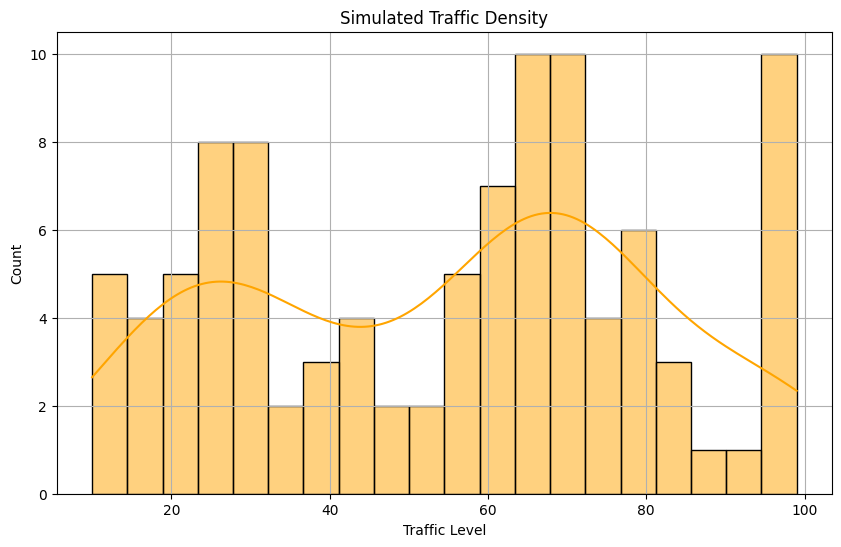

In [1]:
# Install dependencies
!pip install folium scikit-learn pandas numpy matplotlib seaborn --quiet

# Import libraries
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from folium.plugins import HeatMap

# Simulate urban data
np.random.seed(42)
num_points = 100
city_data = pd.DataFrame({
    'lat': np.random.uniform(12.90, 13.10, num_points),
    'lon': np.random.uniform(77.50, 77.70, num_points),
    'population_density': np.random.randint(100, 10000, num_points),
    'traffic': np.random.randint(10, 100, num_points)
})

# AI clustering for zoning
kmeans = KMeans(n_clusters=3, n_init='auto')
city_data['zone'] = kmeans.fit_predict(city_data[['lat', 'lon']])
zone_names = {0: 'Residential', 1: 'Commercial', 2: 'Industrial'}
city_data['zone_name'] = city_data['zone'].map(zone_names)

# Map with zone markers
zone_colors = {'Residential': 'green', 'Commercial': 'blue', 'Industrial': 'red'}
m = folium.Map(location=[13.0, 77.6], zoom_start=12)
for _, row in city_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=zone_colors[row['zone_name']],
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['zone_name']} | Pop: {row['population_density']} | Traffic: {row['traffic']}"
    ).add_to(m)

# Show zoning map
display(m)

# Heatmap for population density
heat_data = city_data[['lat', 'lon', 'population_density']].values.tolist()
m_heat = folium.Map(location=[13.0, 77.6], zoom_start=12)
HeatMap(heat_data, radius=15).add_to(m_heat)
display(m_heat)

# Traffic histogram
plt.figure(figsize=(10, 6))
sns.histplot(city_data['traffic'], bins=20, kde=True, color='orange')
plt.title('Simulated Traffic Density')
plt.xlabel('Traffic Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()
